# TP - Parte 1
## Análisis de datos sobre dataset ["Crímenes reportados en Chicago", año 2024](https://data.cityofchicago.org/Public-Safety/Crimes-2024/dqcy-ctma/about_data) 

### Consignas
El análisis debe abordar los siguientes aspectos:
 * Planteo de al menos tres preguntas a ser respondidas mediante análisis de datos.
    * Se pueden usar como ejemplo las preguntas sugeridas, o proponer otras.
 * Exploración y comprensión de los datos:
    * Cargar el dataset proporcionado y realizar un análisis exploratorio de los datos.
    * Describir las características principales del dataset, incluyendo el número de observaciones, número de variables y tipos de datos.
    * Identificar patrones generales, distribuciones y cualquier anomalía inicial en los datos.
    * Visualizar las variables más importantes para entender sus relaciones y distribuciones.
 * Aplicación de técnicas de visualización:
    * Utilizar técnicas de visualización adecuadas para ilustrar las principales características del dataset.
    * Asegurarse de que las visualizaciones sean claras, concisas y efectivas para comunicar la información.
    * Interpretar los resultados obtenidos a partir de las visualizaciones.
 * Limpieza del dataset:
    * Identificar y tratar los valores faltantes en el dataset.
    * Detectar y manejar los outliers utilizando técnicas estadísticas o visuales apropiadas.

### Preguntas sugeridas según el dataset elegido
 1. ¿Cómo varía la distribución de los crímenes a lo largo de las horas del día, los días de la semana y los meses del año?
 2. ¿Se observan anomalías y/o patrones estacionales?
 3. ¿Hay diferencias significativas entre el número de crímenes en distintos distritos o comunas?
 4. ¿Están las fuerzas policiales bien distribuidas en relación a las características de cada zona? (ej: la mayor cantidad de actividad policial/arrestos se registra en las zonas críticas)
 5. ¿Cómo variaron los crímenes en la ciudad después de algún cambio o evento social importante? (ej: Covid-19, protestas, etc.)


#### Integrantes:
* Mealla Pablo
* Viñas Gustavo

Descripción de columnas según información provista en el origen del dataset

| Nombre columna | Descripción | Tipo de dato |
| --- | --- | --- |
|	ID	|	Unique identifier for the record.	|	Number	|
|	Case Number	|	The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.	|	Text	|
|	Date	|	Date when the incident occurred. this is sometimes a best estimate.	|	Floating Timestamp	|
|	Block	|	The partially redacted address where the incident occurred, placing it on the same block as the actual address.	|	Text	|
|	IUCR	|	The Illinois Uniform Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.	|	Text	|
|	Primary Type	|	The primary description of the IUCR code.	|	Text	|
|	Description	|	The secondary description of the IUCR code, a subcategory of the primary description.	|	Text	|
|	Location Description	|	Description of the location where the incident occurred.	|	Text	|
|	Arrest	|	Indicates whether an arrest was made.	|	Checkbox	|
|	Domestic	|	Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.	|	Checkbox	|
|	Beat	|	Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.	|	Text	|
|	District	|	Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.	|	Text	|
|	Ward	|	The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.	|	Number	|
|	Community Area	|	Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.	|	Text	|
|	FBI Code	|	Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).See the Chicago Police Department listing of these classifications at https://gis.chicagopolice.org/pages/crime_details.	|	Text	|
|	X Coordinate	|	The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.	|	Number	|
|	Y Coordinate	|	The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.	|	Number	|
|	Year	|	Year the incident occurred.	|	Number	|
|	Updated On	|	Date and time the record was last updated.	|	Floating Timestamp	|
|	Latitude	|	The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.	|	Number	|
|	Longitude	|	The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.	|	Number	|
|	Location	|	The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.	|	Point	|



In [1]:
# Import de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime as dt

plt.style.use('ggplot')
sns.set_theme()

In [2]:
# Carga del dataset
df_csv = pd.read_csv("dataset/Crimes_-_2024_20250502.zip", index_col="ID")

# Análisis inicial de columnas y cantidad de datos
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258082 entries, 13709672 to 13656417
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Case Number           258082 non-null  object 
 1   Date                  258082 non-null  object 
 2   Block                 258082 non-null  object 
 3   IUCR                  258082 non-null  object 
 4   Primary Type          258082 non-null  object 
 5   Description           258082 non-null  object 
 6   Location Description  257054 non-null  object 
 7   Arrest                258082 non-null  bool   
 8   Domestic              258082 non-null  bool   
 9   Beat                  258082 non-null  int64  
 10  District              258082 non-null  int64  
 11  Ward                  258082 non-null  int64  
 12  Community Area        258080 non-null  float64
 13  FBI Code              258082 non-null  object 
 14  X Coordinate          257858 non-null  float64
 

Nos encontramos que el dataset tiene:
   * Columnas: 22 
      * 2 bool
      * 5 float
      * 4 int
      * 10 string
   * Filas (observaciones): 258.082

En principio, vemos que hay columnas con datos nulos, se observan en el conteo de not-null previo.  
Las columnas con datos nulos son:
   * Location Description
   * Community Area
   * X Coordinate
   * Y Coordinate
   * Latitude
   * Longitude
   * Location

In [3]:
# Verificación de que el dataset solo tiene datos del año elegido

print(df_csv["Year"].unique())

[2024]


In [4]:
# Visualización de algunas líneas del dataset

with pd.option_context('display.max_columns', None):
    display(df_csv.head())

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
ID,,,,,,,,,,,,,,,,,,,,,
13709672,JJ101940,12/31/2024 11:58:00 PM,014XX E 68TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,332,3,5,43.0,14,1186817.0,1860189.0,2024,01/08/2025 03:42:09 PM,41.771470,-87.590742,POINT (-87.59074212 41.771470188)
13707925,JJ100089,12/31/2024 11:56:00 PM,047XX S DR MARTIN LUTHER KING JR DR,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,True,True,223,2,3,38.0,26,1179661.0,1873623.0,2024,01/08/2025 03:42:09 PM,41.808501,-87.616563,POINT (-87.616562762 41.808500903)
13708038,JJ100035,12/31/2024 11:55:00 PM,077XX S CICERO AVE,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",HOTEL / MOTEL,False,True,834,8,18,70.0,04B,1145740.0,1853048.0,2024,01/08/2025 03:42:09 PM,41.752749,-87.741498,POINT (-87.741497836 41.752748627)
13709164,JJ101392,12/31/2024 11:53:00 PM,066XX S GREENWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,321,3,20,42.0,14,1184362.0,1861188.0,2024,01/08/2025 03:42:09 PM,41.774269,-87.599710,POINT (-87.599709962 41.774269351)
13707823,JJ100020,12/31/2024 11:50:00 PM,012XX N MENARD AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,2531,25,29,25.0,08B,1137458.0,1907694.0,2024,01/08/2025 03:42:09 PM,41.902858,-87.770537,POINT (-87.770536741 41.902858242)


Las columnas "ID" y "Case Number" identifican cada crimen. La primera es respecto al dataset, la segunda es respecto a la policia de Chicago.  
La columna "Primary Type" es la categoría del crimen y, junto con "Description", agrupan el incidente ocurrido.  
La codificación de ambas proviene de la columna "IUCR", que es el código que identifica el tipo de crimen acontecido. Tambien se encuentra la columna "FBI Code", con la categoría del crimen correspondiente al FBI.  
Las columnas "Block", "X Coordinate"/"Y Coordinate", "Latitude"/"Longitude" y "Location" representan la ubicación aproximada del crimen, con diferentes formatos.  


In [5]:
duplicados = df_csv[df_csv.duplicated(keep=False)]
print(f"Filas duplicadas: {len(duplicados)}, casos: {len(duplicados['Case Number'].unique())}")
display(duplicados)

Filas duplicadas: 16, casos: 8


,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
ID,,,,,,,,,,,,,,,,,,,,,
28505,JH528033,12/02/2024 05:20:00 PM,035XX W 59TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,822,...,14,66.0,01A,1153865.0,1865267.0,2024,12/10/2024 03:41:06 PM,41.786122,-87.711399,POINT (-87.711398843 41.78612225)
28506,JH528033,12/02/2024 05:20:00 PM,035XX W 59TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,822,...,14,66.0,01A,1153865.0,1865267.0,2024,12/10/2024 03:41:06 PM,41.786122,-87.711399,POINT (-87.711398843 41.78612225)
28414,JH459847,10/07/2024 10:45:00 PM,078XX S WESTERN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,True,False,835,...,18,70.0,01A,1161739.0,1852605.0,2024,10/15/2024 03:41:39 PM,41.751216,-87.682880,POINT (-87.682879763 41.751216002)
28415,JH459847,10/07/2024 10:45:00 PM,078XX S WESTERN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,True,False,835,...,18,70.0,01A,1161739.0,1852605.0,2024,10/15/2024 03:41:39 PM,41.751216,-87.682880,POINT (-87.682879763 41.751216002)
28235,JH333940,07/05/2024 07:12:00 AM,036XX E 87TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,424,...,10,46.0,01A,1202185.0,1848046.0,2024,07/13/2024 03:41:12 PM,41.737771,-87.534823,POINT (-87.534822726 41.737771151)
28236,JH333940,07/05/2024 07:12:00 AM,036XX E 87TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,424,...,10,46.0,01A,1202185.0,1848046.0,2024,07/13/2024 03:41:12 PM,41.737771,-87.534823,POINT (-87.534822726 41.737771151)
28198,JH317789,06/23/2024 08:44:00 AM,123XX S HALSTED ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,523,...,9,53.0,01A,1173228.0,1823102.0,2024,07/01/2024 03:48:39 PM,41.670009,-87.641647,POINT (-87.641646732 41.670009388)
28199,JH317789,06/23/2024 08:44:00 AM,123XX S HALSTED ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,523,...,9,53.0,01A,1173228.0,1823102.0,2024,07/01/2024 03:48:39 PM,41.670009,-87.641647,POINT (-87.641646732 41.670009388)
28147,JH284448,05/30/2024 02:16:00 AM,028XX S SACRAMENTO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,1033,...,25,30.0,01A,1156822.0,1885102.0,2024,06/07/2024 03:41:01 PM,41.840493,-87.700021,POINT (-87.700020957 41.840492863)


Tenemos 8 casos que aparecen 2 veces cada uno, exactamente iguales, mismo número de caso, mismos datos de crimen.

Ahora, quitamos también las columnas "Date" y "Updated On".  

In [6]:
drop_columns = ["Date", "Updated On"]
df_dup2 = df_csv.drop(drop_columns, axis=1)

duplicados = df_csv[df_dup2.duplicated(keep=False)]
print(f"Filas duplicadas: {len(duplicados)}, casos: {len(duplicados['Case Number'].unique())}")
display(duplicados)

Filas duplicadas: 52, casos: 24


,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
ID,,,,,,,,,,,,,,,,,,,,,
28521,JH539697,12/12/2024 03:40:00 AM,094XX S LA SALLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,634,...,9,49.0,01A,1176941.0,1842351.0,2024,12/20/2024 03:42:06 PM,41.722749,-87.627480,POINT (-87.627480265 41.722748857)
28520,JH539697,12/12/2024 03:23:00 AM,094XX S LA SALLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,634,...,9,49.0,01A,1176941.0,1842351.0,2024,12/20/2024 03:42:06 PM,41.722749,-87.627480,POINT (-87.627480265 41.722748857)
28505,JH528033,12/02/2024 05:20:00 PM,035XX W 59TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,822,...,14,66.0,01A,1153865.0,1865267.0,2024,12/10/2024 03:41:06 PM,41.786122,-87.711399,POINT (-87.711398843 41.78612225)
28506,JH528033,12/02/2024 05:20:00 PM,035XX W 59TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,822,...,14,66.0,01A,1153865.0,1865267.0,2024,12/10/2024 03:41:06 PM,41.786122,-87.711399,POINT (-87.711398843 41.78612225)
28504,JH528033,12/02/2024 02:51:00 PM,035XX W 59TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,822,...,14,66.0,01A,1153865.0,1865267.0,2024,12/10/2024 03:41:06 PM,41.786122,-87.711399,POINT (-87.711398843 41.78612225)
28482,JH505655,11/12/2024 10:37:00 PM,024XX S NORMAL AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,914,...,11,34.0,01A,1173142.0,1888242.0,2024,11/20/2024 03:42:13 PM,41.848763,-87.640040,POINT (-87.640040128 41.84876345)
28481,JH505655,11/12/2024 10:21:00 PM,024XX S NORMAL AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,914,...,11,34.0,01A,1173142.0,1888242.0,2024,11/20/2024 03:42:13 PM,41.848763,-87.640040,POINT (-87.640040128 41.84876345)
28470,JH496538,11/05/2024 02:40:00 PM,006XX E GRAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,OFFICE,True,False,1834,...,42,8.0,01A,1180796.0,1904058.0,2024,11/13/2024 03:41:09 PM,41.891990,-87.611462,POINT (-87.611461502 41.891990384)
28469,JH496538,11/05/2024 02:03:00 PM,006XX E GRAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,OFFICE,True,False,1834,...,42,8.0,01A,1180796.0,1904058.0,2024,11/13/2024 03:41:09 PM,41.891990,-87.611462,POINT (-87.611461502 41.891990384)


Tenemos 52 repetidos.  
Observando algún caso particular, como el JH165644, vemos que es un registro cargado 3 veces, con IDs 27994, 27995 y 27996, con 3 fechas distintas de crimen, aunque distantes solo unos minutos entre si (todas el 25/02/2024, con horarios 07:59:00 PM, 08:10:00 PM y 08:16:00 PM).  
Hay casos donde los registros son exactamente iguales, tambien otros donde las fechas tienen algunos días de distancia.  
Podemos suponer que son registros duplicados/triplicados?  
O que se carga un registro por cada victima en los casos de multiples victimas?

Vamos a quitar las columnas "Case Number" y "Updated On" para observar los duplicados tambien

In [7]:
drop_columns = ["Case Number", "Updated On"]
df_dup3 = df_csv.drop(drop_columns, axis=1)

duplicados = df_csv[df_dup3.duplicated(keep=False)]
print(f"Filas duplicadas: {len(duplicados)}")
display(duplicados)

Filas duplicadas: 826


,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
ID,,,,,,,,,,,,,,,,,,,,,
13707497,JH561436,12/31/2024 02:30:00 PM,018XX W NEWPORT AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1922,...,47,5.0,14,1163353.0,1922932.0,2024,01/08/2025 03:42:09 PM,41.944167,-87.674990,POINT (-87.674989557 41.944166715)
13707532,JH561380,12/31/2024 02:30:00 PM,018XX W NEWPORT AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1922,...,47,5.0,14,1163353.0,1922932.0,2024,01/08/2025 03:42:09 PM,41.944167,-87.674990,POINT (-87.674989557 41.944166715)
13815408,JJ228638,12/26/2024 09:30:00 PM,132XX S RIVERDALE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,533,...,10,54.0,07,1181636.0,1817783.0,2024,04/27/2025 03:40:45 PM,41.655224,-87.611038,POINT (-87.611037691 41.655223932)
13815457,JJ229689,12/26/2024 09:30:00 PM,132XX S RIVERDALE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,533,...,10,54.0,07,1181636.0,1817783.0,2024,04/27/2025 03:40:45 PM,41.655224,-87.611038,POINT (-87.611037691 41.655223932)
13702075,JH554828,12/25/2024 08:59:00 AM,009XX W DAKIN ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1923,...,46,6.0,14,1169342.0,1926419.0,2024,01/02/2025 03:41:34 PM,41.953607,-87.652875,POINT (-87.652875013 41.953606846)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13327536,JH102991,01/01/2024 08:56:00 PM,020XX N AUSTIN AVE,0610,BURGLARY,FORCIBLE ENTRY,COMMERCIAL / BUSINESS OFFICE,False,False,2515,...,29,19.0,05,1136075.0,1912924.0,2024,12/21/2024 03:40:46 PM,41.917235,-87.775492,POINT (-87.775491899 41.917234781)
13326167,JH101437,01/01/2024 12:00:00 AM,040XX S DREXEL BLVD,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,214,...,4,36.0,14,1182780.0,1878176.0,2024,12/21/2024 03:40:46 PM,41.820923,-87.604982,POINT (-87.604981565 41.820922725)
13326068,JH101415,01/01/2024 12:00:00 AM,040XX S DREXEL BLVD,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,214,...,4,36.0,14,1182780.0,1878176.0,2024,12/21/2024 03:40:46 PM,41.820923,-87.604982,POINT (-87.604981565 41.820922725)


Tenemos ahora 826 filas con registros duplicados, pero en esta observación, distintos números de caso.  
Es decir, son crimenes ocurridos el mismo día, misma hora, mismo lugar, mismas características, pero cargados como casos distintos.  
Nuevamente podríamos preguntarnos, se carga un número de caso por cada victima en los casos de multiples victimas?  
Se registró el caso dos veces por error? por fallos en el sistema al momento de la carga?   

Para nuestro análisis, vamos a considerar duplicados aquellos registros con mismo número de caso, sin importar la fecha, por lo tanto, nos quedaremos solo con el último.

Para continuar, también crearemos nuevas columnas a partir de datos existentes, que nos servirán para analizar otros aspectos de los casos, y eliminaremos columnas que consideramos innecesarias.

In [8]:
# Eliminamos los duplicados obtenidos en df_dup2
df_csv.sort_values(axis=0, by=["Updated On", "Date"], ascending=True).drop_duplicates(df_dup2.columns, keep='last', inplace=True)

# Convertimos la columna Date a datetime para luego agregar columnas con información sobre características de la fecha
df_csv["Date"] = pd.to_datetime(df_csv.Date, format="%m/%d/%Y %I:%M:%S %p")

# Agregamos al dataset información sobre la hora del crimen, el día de la semana y el mes del año en que ocurrieron
df_csv["Hour"] = df_csv.Date.dt.hour
df_csv["Day Of Week"] = df_csv.Date.dt.dayofweek
df_csv["Day"] = df_csv.Date.dt.day
df_csv["Month"] = df_csv.Date.dt.month

# Eliminamos columnas que consideramos no tienen aporte significativo, que tiene valores únicos para cada fila o mismo valor para todas las filas
# Case number: único para todos los registros (desde el momento que nos quedamos con )
drop_columns = ["Case Number", "Block", "X Coordinate", "Y Coordinate", "Year", "Updated On", "Location"]
df_csv.drop(drop_columns, inplace=True, axis=1)

In [9]:
df_csv.describe()

,Date,Beat,District,Ward,Community Area,Latitude,Longitude,Hour,Day Of Week,Day,Month
count,258082,258082.000000,258082.000000,258082.000000,258080.000000,257858.000000,257858.000000,258082.000000,258082.000000,258082.000000,258082.000000
mean,2024-07-02 15:08:32.286319616,1157.082869,11.340930,23.186386,36.181975,41.847523,-87.668949,12.509195,2.993231,15.636189,6.537496
min,2024-01-01 00:00:00,111.000000,1.000000,1.000000,1.000000,41.644590,-87.934567,0.000000,0.000000,1.000000,1.000000
25%,2024-04-07 12:00:00,533.000000,5.000000,10.000000,22.000000,41.772686,-87.709920,8.000000,1.000000,8.000000,4.000000
50%,2024-07-03 17:03:00,1034.000000,10.000000,23.000000,32.000000,41.866051,-87.661858,13.000000,3.000000,16.000000,7.000000
75%,2024-09-26 22:30:00,1732.000000,17.000000,34.000000,53.000000,41.910073,-87.627352,18.000000,5.000000,23.000000,9.000000
max,2024-12-31 23:58:00,2535.000000,31.000000,50.000000,77.000000,42.022548,-87.524531,23.000000,6.000000,31.000000,12.000000
std,NaN,709.299226,7.087626,13.948307,21.605424,0.086725,0.058844,6.851939,2.007751,8.887205,3.350021


In [10]:
# Valores faltantes
missing_data = df_csv.isna().sum()
missing_data = missing_data[missing_data>0]
print(f"Valores faltantes:\n{missing_data.sort_values(ascending = False)}")

Valores faltantes:
Location Description    1028
Latitude                 224
Longitude                224
Community Area             2
dtype: int64


Se observa que el atributo "Location Description" tiene valores faltantes, este atributo nos da una descripcion de donde ocurrió el crimen.

Tambien se observa que hay valores faltantes para latitud/logitud, que es la ubicación aproximada del hecho, y solo 2 faltantes para Community Area.  

Esto es similar al análisis de columnas previo, solo que aqui contamos los nulos en lugar de los no nulos, y lo hacemos luego de quitar columnas irrelevantes y duplicados.

En el caso de Location Description, el porcentaje de nulos sobre el total es de 0.4%, en Latitud, Longitud y Community Area mucho menor inclusive.  
En total no llegan al 1%, por ese motivo decidimos eliminar los faltantes.

In [11]:
df_csv.dropna(inplace=True)

Vamos a observar los datos mediante gráficas

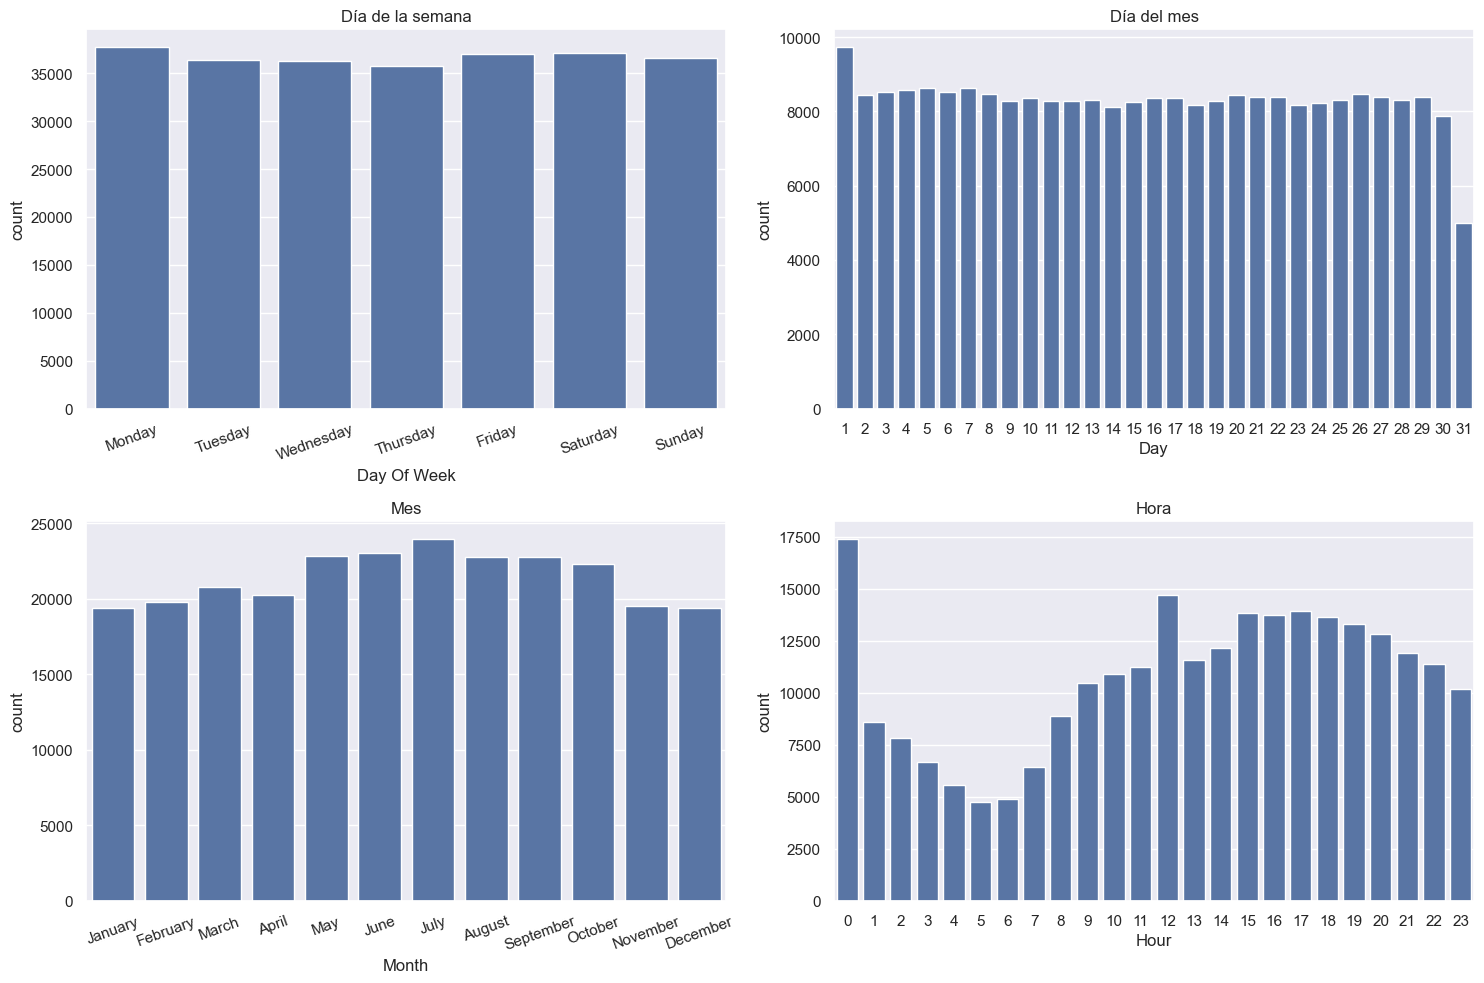

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
# día de la semana
sns.countplot(data=df_csv, x='Day Of Week', ax=ax[0,0])
ax[0,0].set_xticks(range(0,7), calendar.day_name[0:7], rotation=20)
ax[0,0].set_title('Día de la semana')
# día del mes
sns.countplot(data=df_csv, x='Day', ax=ax[0,1])
ax[0,1].set_title('Día del mes')
# mes
sns.countplot(data=df_csv, x='Month', ax=ax[1,0])
ax[1,0].set_xticks(range(0,12), calendar.month_name[1:13], rotation=20)
ax[1,0].set_title('Mes')
# hora
sns.countplot(data=df_csv, x='Hour', ax=ax[1,1])
ax[1,1].set_xticks(range(0,24), range(0,24))
ax[1,1].set_title('Hora')

plt.tight_layout()
plt.show()

Hacemos el mismo análisis, aplicando escala logarítmica en los ejes Y, debido a la gran cantidad de datos.

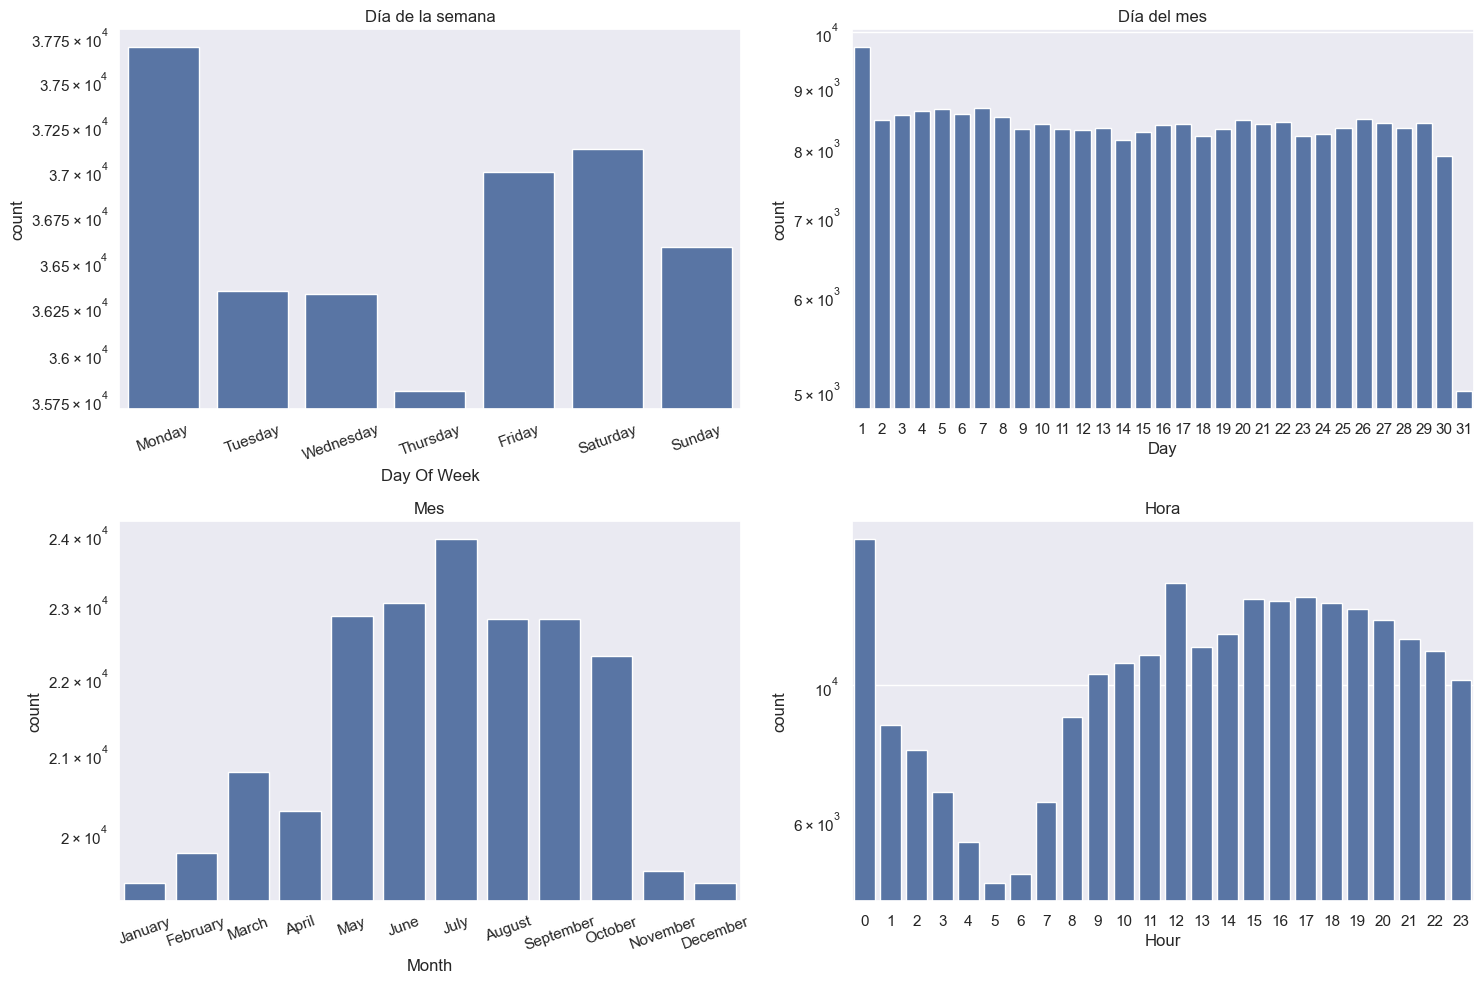

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
# día de la semana
sns.countplot(data=df_csv, x='Day Of Week', ax=ax[0,0])
ax[0,0].set_xticks(range(0,7), calendar.day_name[0:7], rotation=20)
ax[0,0].set_title('Día de la semana')
ax[0,0].set(yscale="log")

# día del mes
sns.countplot(data=df_csv, x='Day', ax=ax[0,1])
ax[0,1].set_title('Día del mes')
ax[0,1].set(yscale="log")

# mes
sns.countplot(data=df_csv, x='Month', ax=ax[1,0])
ax[1,0].set_xticks(range(0,12), calendar.month_name[1:13], rotation=20)
ax[1,0].set_title('Mes')
ax[1,0].set(yscale="log")
# hora
sns.countplot(data=df_csv, x='Hour', ax=ax[1,1])
ax[1,1].set_xticks(range(0,24), range(0,24))
ax[1,1].set_title('Hora')
ax[1,1].set(yscale="log")

plt.tight_layout()
plt.show()

De los gráficos se observa que:
 * Julio es el mes con mas crímenes (verano en Chicago), mientras que diciembre es el mes con menos crímenes (invierno en Chicago).  
 * Según los días de la semana, a priori no se observaba una tendencia marcada sobre algún día particular, pero al aplicar escala logarítmica, se observa que los días jueves tienen menos crímenes, y los días lunes hay más.  
 * En cuanto a las horas, se ven 2 picos que llaman la atención, a las 0 y 12 horas. Debemos realizar un análisis sobre estos casos.  
   Tambien se ve que hay menos crímenes entre las 5 y 6 horas, y más crímenes entre las 15 y las 18 horas. (Mas crímenes durante la tarde, menos durante la madrugada)
 * Por último, en los días del mes, tambien se ve un comportamiento extraño en el día 1 (con un pico inusual) y pocos casos en el día 31 (estos pueden ser porque la mitad de los meses tienen 31 días). 

Convertimos las columnas categoricas, para realizar un análisis mas detallado sobre ellas

In [14]:
# Convertimos columnas del dataset al tipo correcto
categorical_cols = ['IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code']
df_csv[categorical_cols] = df_csv[categorical_cols].astype('category')

# Según la descripción de columnas del dataset, son 22 distritos policiales
print(f"Cantidad de distritos policiales: {len(df_csv['District'].cat.categories)}")

# Según la descripción de columnas del dataset, son 77 áreas comunitarias
print(f"Cantidad de distritos policiales: {len(df_csv['Community Area'].cat.categories)}")

Cantidad de distritos policiales: 23
Cantidad de distritos policiales: 77


In [15]:
df_csv.describe(include='category')

,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code
count,256840,256840,256840,256840,256840,256840,256840,256840,256840,256840.0,256840
unique,340,31,318,128,2,2,275,23,50,77.0,26
top,0486,THEFT,SIMPLE,STREET,False,False,1834,8,27,25.0,06
freq,20371,60381,31499,69547,221453,209442,3066,17171,11919,12862.0,61154


De los datos del resumen previo, podemos concluir rápidamente

In [16]:
def top_percent(df, col):
    data = df.describe(include='category')[col]
    return data['top'], f"{(data['freq'] * 100 / data['count']):.2f}"

t, p = top_percent(df_csv, "IUCR")
print(f"Hay más crímenes clasificados con código {t} según el IUCR ({p}%)")
t, p = top_percent(df_csv, "Primary Type")
print(f"Hay más crímenes del tipo {t} ({p}%)")
t, p = top_percent(df_csv, "Description")
print(f"Hay más crímenes con descripción {t} ({p}%)")
t, p = top_percent(df_csv, "Location Description")
print(f"Hay más crímenes en {t} ({p}%)")
t, p = top_percent(df_csv, "Arrest")
print(f"Porcentaje de arrestos {p if t==True else (100-float(p)):.2f}%")
t, p = top_percent(df_csv, "Domestic")
print(f"Porcentaje de crímenes domésticos {p if t==True else (100-float(p)):.2f}%")
t, p = top_percent(df_csv, "District")
print(f"Hay más crímenes en el distrito policial {t} ({p}%)")
t, p = top_percent(df_csv, "FBI Code")
print(f"Hay más crímenes con código FBI {t} ({p}%)")


Hay más crímenes clasificados con código 0486 según el IUCR (7.93%)
Hay más crímenes del tipo THEFT (23.51%)
Hay más crímenes con descripción SIMPLE (12.26%)
Hay más crímenes en STREET (27.08%)
Porcentaje de arrestos 13.78%
Porcentaje de crímenes domésticos 18.45%
Hay más crímenes en el distrito policial 8 (6.69%)
Hay más crímenes con código FBI 06 (23.81%)


Veamos algunos gráficos de estas variables

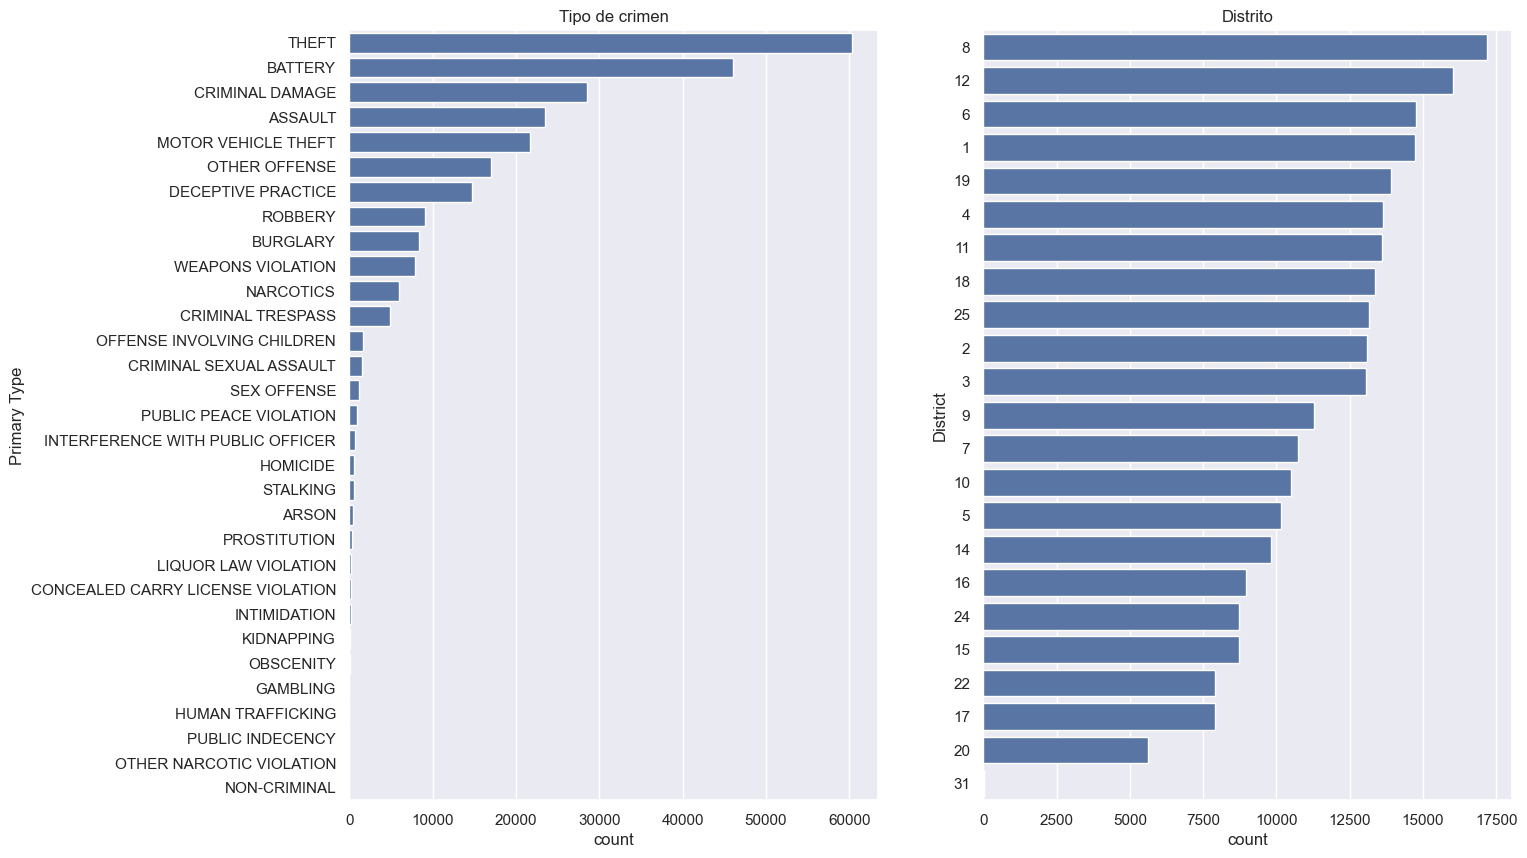

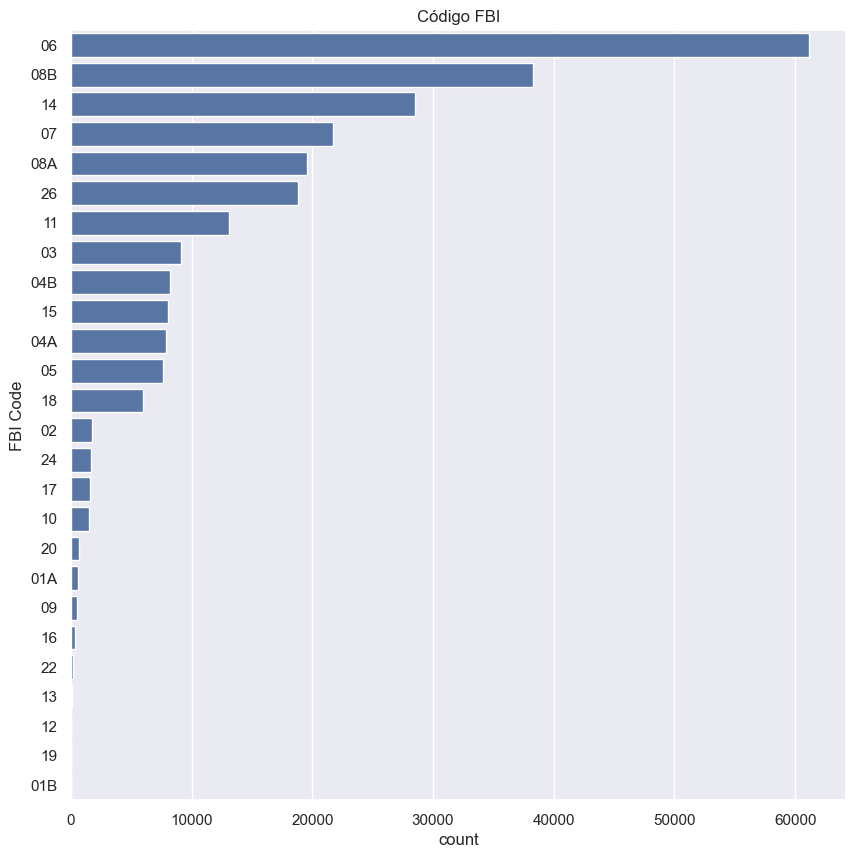

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
# tipo de crimen
sns.countplot(data=df_csv, y='Primary Type', order=df_csv['Primary Type'].value_counts().index, ax=ax[0])
ax[0].set_title('Tipo de crimen')
# distrito
sns.countplot(data=df_csv, y='District', order=df_csv['District'].value_counts().index, ax=ax[1])
ax[1].set_title('Distrito')
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
# código FBI
sns.countplot(data=df_csv, y='FBI Code', order=df_csv['FBI Code'].value_counts().index, ax=ax)
ax.set_title('Código FBI')
plt.show()


Los distritos 8, 12, 1 y 6 son los que tienen mayor cantidad de crímenes.

El distrito 31 parece tener muy pocos crimenes, observamos la muestra

In [18]:
df_csv[df_csv["District"] == 31]

,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Hour,Day Of Week,Day,Month
ID,,,,,,,,,,,,,,,,,,
13687936,2024-12-09 22:30:00,1320,CRIMINAL DAMAGE,TO VEHICLE,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,False,False,1653,31,41,76.0,14,41.965057,-87.879953,22,0,9,12
13687507,2024-12-09 20:47:00,2027,NARCOTICS,POSSESS - CRACK,SIDEWALK,True,False,2422,31,49,1.0,18,42.019386,-87.673147,20,0,9,12
13680124,2024-12-02 01:50:00,0860,THEFT,RETAIL THEFT,CONVENIENCE STORE,False,False,1654,31,41,76.0,06,41.999621,-87.892058,1,0,2,12
13657886,2024-11-08 14:25:00,0560,ASSAULT,SIMPLE,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,False,False,1653,31,41,76.0,08A,41.965057,-87.879953,14,4,8,11
13606497,2024-09-22 08:10:00,0860,THEFT,RETAIL THEFT,GAS STATION,True,False,1654,31,41,76.0,06,41.999621,-87.892058,8,6,22,9
13602789,2024-09-18 01:00:00,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1653,31,41,76.0,14,41.965057,-87.879953,1,2,18,9
13570671,2024-08-20 12:45:00,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,1654,31,41,76.0,06,41.999621,-87.892058,12,1,20,8
13533626,2024-07-18 13:00:00,0560,ASSAULT,SIMPLE,AIRPORT EXTERIOR - SECURE AREA,False,False,1653,31,41,76.0,08A,41.965057,-87.879953,13,3,18,7
13535074,2024-07-02 11:00:00,1120,DECEPTIVE PRACTICE,FORGERY,BANK,False,False,1654,31,41,76.0,10,42.008962,-87.906473,11,1,2,7


Analizando el origen de los datos, entendemos que los 2 primeros dígitos de la columna Beat son el District ([fuente](https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Beats-current-/aerh-rz74))

Con esta información podemos suponer que los casos del District 31 esta mal cargados.  
Incluso podemos verificar si esto se extiende a otros casos.

In [19]:
df_csv[df_csv["District"] != (df_csv["Beat"].astype(int) // 100)]

,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,Hour,Day Of Week,Day,Month
ID,,,,,,,,,,,,,,,,,,
13687936,2024-12-09 22:30:00,1320,CRIMINAL DAMAGE,TO VEHICLE,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,False,False,1653,31,41,76.0,14,41.965057,-87.879953,22,0,9,12
13687507,2024-12-09 20:47:00,2027,NARCOTICS,POSSESS - CRACK,SIDEWALK,True,False,2422,31,49,1.0,18,42.019386,-87.673147,20,0,9,12
13680124,2024-12-02 01:50:00,0860,THEFT,RETAIL THEFT,CONVENIENCE STORE,False,False,1654,31,41,76.0,06,41.999621,-87.892058,1,0,2,12
13657886,2024-11-08 14:25:00,0560,ASSAULT,SIMPLE,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,False,False,1653,31,41,76.0,08A,41.965057,-87.879953,14,4,8,11
13606497,2024-09-22 08:10:00,0860,THEFT,RETAIL THEFT,GAS STATION,True,False,1654,31,41,76.0,06,41.999621,-87.892058,8,6,22,9
13602789,2024-09-18 01:00:00,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1653,31,41,76.0,14,41.965057,-87.879953,1,2,18,9
13570671,2024-08-20 12:45:00,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,1654,31,41,76.0,06,41.999621,-87.892058,12,1,20,8
13533626,2024-07-18 13:00:00,0560,ASSAULT,SIMPLE,AIRPORT EXTERIOR - SECURE AREA,False,False,1653,31,41,76.0,08A,41.965057,-87.879953,13,3,18,7
13535074,2024-07-02 11:00:00,1120,DECEPTIVE PRACTICE,FORGERY,BANK,False,False,1654,31,41,76.0,10,42.008962,-87.906473,11,1,2,7


Vemos que solo los casos del District 31 tienen diferencias, podemos solucionarlo reemplazando por el District calculado a partir de Beat

In [20]:
df_csv.loc[df_csv["District"] == 31, "District"] = df_csv.loc[df_csv["District"] == 31, "Beat"].astype(int) // 100
df_csv["District"] = df_csv["District"].cat.remove_unused_categories()

Análisis sobre el dato que nos llamó la atención, la hora 0 y hora 12.  
La sospecha es que en muchos casos se carga la fecha, dejando la hora en 0 (o en 12).

In [21]:
# Separamos los datos con hora 0
df_hour_0 = df_csv[df_csv["Hour"] == 0].copy()
# Agregamos minutos a la observación
df_hour_0["minute"] = df_hour_0.Date.dt.minute
# Visualizamos la cantidad para cada minuto en los datos con hora 0, ordenado descendentemente
display(df_hour_0.groupby("minute")["minute"].count().sort_values(ascending=False))

minute
0     8840
1     1855
30    1084
15     356
45     288
20     262
10     261
50     221
40     209
5      207
25     142
35     136
55     102
2       95
13      92
3       90
12      88
38      86
28      85
52      83
42      82
9       82
16      81
32      81
58      79
4       79
7       78
44      78
29      78
8       76
23      76
27      75
34      75
14      73
56      73
53      72
22      72
18      71
26      70
46      70
41      69
19      69
49      69
21      68
48      68
37      68
57      68
24      67
51      67
43      67
47      66
33      65
6       61
39      61
17      60
54      58
31      58
11      57
36      56
59      55
Name: minute, dtype: int64

Se observa una amplia cantidad de registros donde para la hora 0, los minutos son 0 también.  
Si bien podría ser un dato real, por la diferencia observada, se presume que muchas veces se carga la fecha, ignorando el horario, por lo que queda en 00:00:00.

Hacemos el mismo análisis para la hora 12

In [22]:
# Separamos los datos con hora 12
df_hour_12 = df_csv[df_csv["Hour"] == 12].copy()
# Agregamos minutos a la observación
df_hour_12["minute"] = df_hour_12.Date.dt.minute
# Visualizamos la cantidad para cada minuto en los datos con hora 12, ordenado descendentemente
display(df_hour_12.groupby("minute")["minute"].count().sort_values(ascending=False))

minute
0     5925
30    1524
45     549
15     516
20     376
40     354
50     350
10     306
25     224
5      203
35     202
55     193
1      114
14      97
17      94
56      94
38      93
9       92
8       92
6       92
48      91
37      91
52      90
18      89
13      89
41      88
19      88
12      87
47      87
7       87
42      86
3       85
49      84
27      84
36      84
28      84
26      84
58      83
34      83
59      82
44      82
4       82
23      82
24      81
33      81
39      80
54      79
32      79
2       78
51      76
29      76
46      73
57      73
53      72
21      72
11      71
22      70
16      67
43      67
31      67
Name: minute, dtype: int64

Se observa un comportamiento similar a la hora 0, se presume que en muchos casos se carga solo la fecha, quedando el horario como mediodía (hora 12).

Estos comportamientos pueden deberse a que la columna Date es en muchos casos "la mejor estimación" del día y horario del hecho.

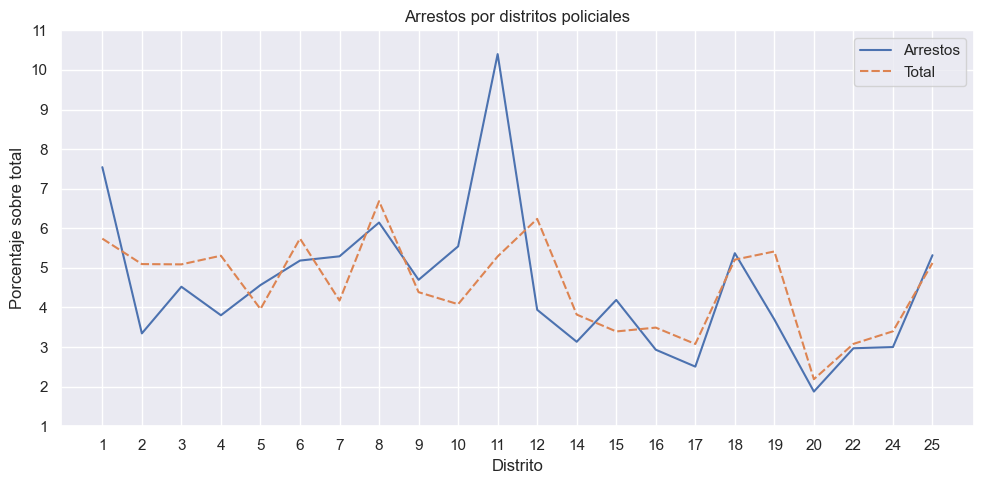

In [23]:
df_csv["Arrest"] = df_csv["Arrest"].astype(int)
# df_csv["Domestic"] = df_csv["Domestic"].astype(int)

district = df_csv.groupby(["District"], observed=True).agg(
    Arrestos = ('Arrest', "sum"),
    # Domesticos = ('Domestic', "sum"),
    Total = ('Arrest', "count")
).reset_index()

district["Arrestos"] = district["Arrestos"] / district["Arrestos"].sum() * 100
# district["Domesticos"] = district["Domesticos"] / district["Domesticos"].sum() * 100
district["Total"] = district["Total"] / district["Total"].sum() * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.lineplot(data=district, ax=ax)
ax.set_xticks(district.index, district["District"])
ax.set_xlabel("Distrito")
ax.set_title('Arrestos por distritos policiales')
ax.set_yticks(range(1, 12))
ax.set_ylabel("Porcentaje sobre total")

plt.tight_layout()
plt.show()

Análisis de crímenes a lo largo del año

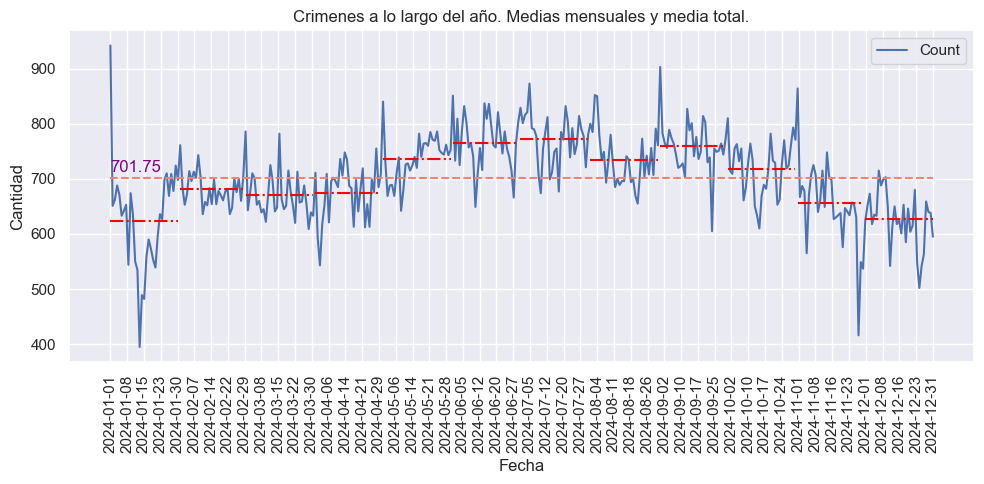

Top 4 máximos:
Date
2024-01-01    942
2024-09-01    903
2024-07-05    873
2024-11-01    864
2024-08-03    852
Name: Count, dtype: int64
Top 4 mínimos:
Date
2024-01-14    395
2024-11-28    416
2024-01-16    482
2024-01-15    489
2024-12-25    502
Name: Count, dtype: int64


In [24]:
dates = pd.DataFrame(df_csv.groupby(df_csv["Date"].dt.date)["Date"].count().rename("Count"))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.lineplot(data=dates, ax=ax)
ax.hlines(y=dates.mean(), xmin=dates.index.min(), xmax=dates.index.max(), color='salmon', linestyle='--')
ax.text(dates.index.min(), dates['Count'].mean() + 10, f"{dates['Count'].mean():.2f}", color='purple')
plt.xticks(pd.date_range(dates.index.min(), dates.index.max(), 50), rotation=90)
ax.set_xlabel("Fecha")
ax.set_title('Crimenes a lo largo del año. Medias mensuales y media total.')
ax.set_ylabel("Cantidad")

for mes in range(1,13):
    low_date = dt.date(2024, mes, 1)
    if (mes == 12):
        high_date = dt.date(2024, mes, 31)
    else:
        high_date = dt.date(2024, mes + 1, 1) - dt.timedelta(days=1)
    filtered = dates[(dates.index >= low_date) & (dates.index < high_date)]
    ax.hlines(y=filtered.mean(), xmin=low_date, xmax=high_date, color='red', linestyle='-.')

plt.tight_layout()
plt.show()

count_dates = dates['Count'].sort_values()
print(f"Top 4 máximos:\n{count_dates.tail(5).sort_values(ascending=False)}")
print(f"Top 4 mínimos:\n{count_dates.head(5)}")

#### Fechas con mayor cantidad de crímenes:
* Respecto al 1ro de enero no podemos encontrar motivo que justifique el incremento tan marcado de crímenes.  
  Ante esto, podemos imaginar 2 hipótesis:
  * Los crímenes sin fecha cierta, se asignan por defecto al primer día del año.
  * Para reducir las estadísticas anuales, muchos crímenes del 2023 se anotan como el primer día del 2024.
* Para las demás fechas, no encontramos acontecimientos relevantes que puedan justificar el incremento de crímenes.  
  Son valores que no estan tan lejos de las medias mensuales. Al ser los meses con mas crímenes, estos picos generan máximos.
  Podemos suponer demoras en las cargas de registros, los que producen luego estos picos.

#### Fechas con menor cantidad de crímenes:
* Es evidente la baja de crímenes entre el 14 y 16 de enero.  
  Buscando motivos para esa fecha, encontramos que [se registró una gran nevada en EE.UU.](https://www.infobae.com/estados-unidos/2024/01/16/invierno-congelado-en-estados-unidos-al-menos-siete-muertos-cortes-de-energia-escuelas-cerradas-y-vuelos-cancelados/), motivo por el cual asumimos se registró el descenso marcado.

* En cuanto al día 28 de noviembre, nos encontramos que se celebró el [día de acción de gracias](https://www.infobae.com/estados-unidos/2024/11/18/que-dia-se-celebra-accion-de-gracias-en-2024/).  
  Podemos suponer que dicho día es muy importante para el país, y un motivo por el cual puede observarse menor cantidad de crímenes.

* Por último, el 25 de diciembre, navidad, también nos hace suponer que es el motivo para el descenso de ese día.

Analizamos la cantidad por mes en boxplots para ver outliers

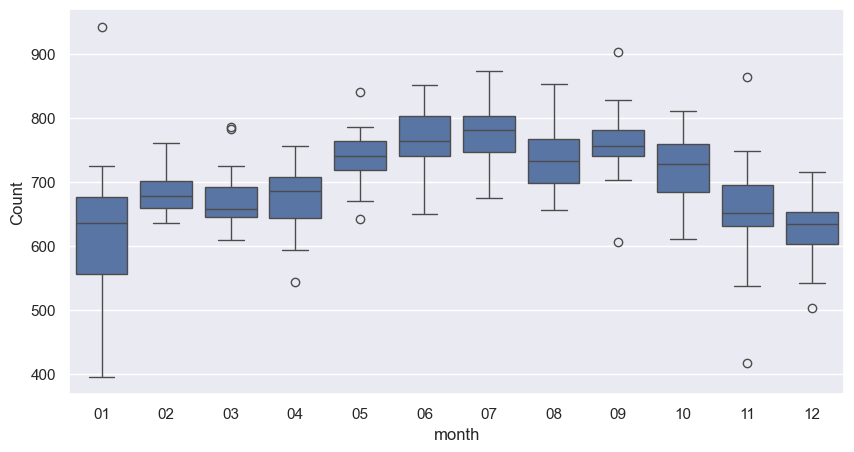

In [25]:
dates['month'] = [x.strftime('%m') for x in dates.index]

fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x='month',y='Count',data=dates,ax=ax)
plt.show()